## BCA Assay with Jupyter notebook

Here's my notes on determine the trendline and R^2 value for BCA standard curve analysis.

In [96]:
#Before beginning, you need to have miniconda3 installed on your computer. You can find installation instructions here: https://docs.conda.io/en/latest/miniconda.html



In [ ]:
#Next, you will need to access the terminal (command on a PC and terminal on a mac) and create a conda environment. You can create an environment with the name "Bio133" by typing the following code in your terminal:

conda create -n bio133

#Now that the environment is created, you can access it by typing the following command:

conda activate bio133

In [ ]:
#Now that you have activated your new environment, you will need to install some packages into it. For this tutorial, you will need to install matplotlib, pandas, seaborn, openpyxl, and jupyter notebook. Install each component by entering the following commands:

conda install matplotlib #This will install matplotlib in your environment

conda install pandas #This will install pandas in your environment

conda install openpyxl #This will install openpyxl in your environment

conda install jupyter notebook #This will install jupyter lab notebook in your environment

conda install numpy #This will install numpy in your environment


In [ ]:
#Now you are ready to access jupyter notebook. You can do so by entering the following command into your environment:

jupyter notebook


In [ ]:
#Once you are into Jupyter notebook, you will create a new file (Python 3 file). You can name this file whatever you want. In this file, we will create a graph by running the following code:

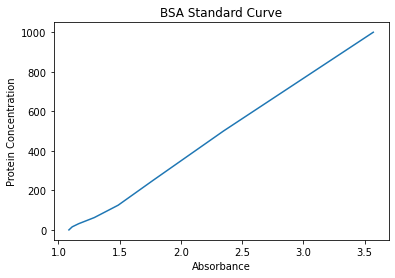

In [98]:
# Let's make a standard curve plotting with matplotlib
import matplotlib.pyplot as plt
  
x = [3.5710, 2.3470, 1.7710, 1.4875, 1.2930, 1.1645, 1.1125, 1.0855]  # x axis values 
y = [1000,500,250,125,62.5,31.25,15.625,0] # corresponding y axis values 
   
plt.plot(x, y) # plotting the points in line format 

plt.xlabel('Absorbance') # naming the x axis 
 
plt.ylabel('Protein Concentration') # naming the y axis
  
plt.title('BSA Standard Curve') # give a title to your graph (note: it automatically puts the title on top) 
   
plt.show() # function to show the plot

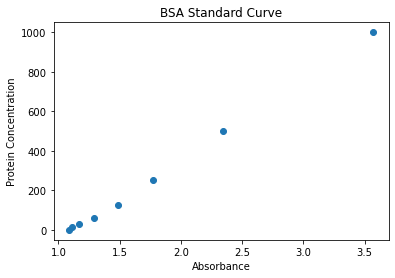

In [99]:
x = [3.5710, 2.3470, 1.7710, 1.4875, 1.2930, 1.1645, 1.1125, 1.0855]  # x axis values 
y = [1000,500,250,125,62.5,31.25,15.625,0] # corresponding y axis values 
   
plt.plot(x, y,'o') # plotting the points in scatter plot format 

plt.xlabel('Absorbance') # naming the x axis 
 
plt.ylabel('Protein Concentration') # naming the y axis
  
plt.title('BSA Standard Curve') # give a title to your graph (note: it automatically puts the title on top) 
   
plt.show() # function to show the plot

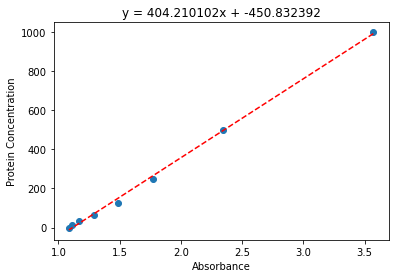

r^2 value is:  0.9981275231607426


In [110]:
#You can add a trendline to the data using the following code:
import numpy as np

x = [3.5710, 2.3470, 1.7710, 1.4875, 1.2930, 1.1645, 1.1125, 1.0855]  # x axis values 
y = [1000,500,250,125,62.5,31.25,15.625,0] # corresponding y axis values 

plt.plot(x, y,'o') # plotting the points in scatter plot format 
z = np.polyfit(x, y, 1) # Polynomial fit
p = np.poly1d(z) # one-dimensional polynomial class
plt.plot(x,p(x),"r--")# plot the trendline red and dashed
plt.title("y = %.6fx + %.6f"%(z[0],z[1])) #adds the trendline equation

plt.xlabel('Absorbance') # naming the x axis  
plt.ylabel('Protein Concentration') # naming the y axis

plt.show() # function to show the plot

#Now let's calculate the r squared value and display it on the bottom
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 value is: ", r_squared)


In [144]:
# Now let's try importing an excel document using pandas (and openpyxl)
import pandas as pd

#Notice in the following command I also set the first column 0 to be the index column. This will be helpful when trying to make heat maps later... Be sure to specify the actual location of the file - place "r" before the path string to address special character, such as '\'.
bca = pd.read_excel(r'/Users/jonathanokerblom/BCA_StandardCurve.xlsx') 
print (bca)

       Conc      OD
0  1000.000  3.6710
1   500.000  2.3470
2   250.000  1.7710
3   125.000  1.4875
4    62.500  1.2930
5    31.250  1.1645
6    15.625  1.1125
7     0.000  1.0855


In [145]:
#It's easy to view this data in table form. Just type:

bca

,Conc,OD
0,1000.000,3.6710
1,500.000,2.3470
2,250.000,1.7710
3,125.000,1.4875
4,62.500,1.2930
5,31.250,1.1645
6,15.625,1.1125
7,0.000,1.0855


In [146]:
bca.columns

Index(['Conc', 'OD'], dtype='object')

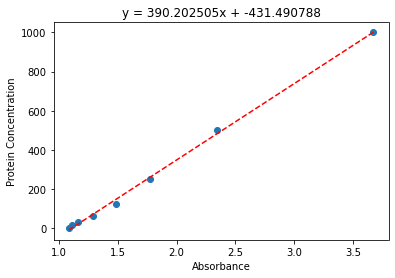

r^2 value is:  0.9984254602245002


In [147]:
#Now let's make a scatter plot of the data using numpy and matplotlib.pyplot                    
import matplotlib.pyplot as plt

x = bca['OD'] #Assign OD column to x
y = bca['Conc'] # Assign Conc column to y

plt.plot(x, y,'o') # plotting the points in scatter plot format 
z = np.polyfit(x, y, 1) # Polynomial fit
p = np.poly1d(z) # one-dimensional polynomial class
plt.plot(x,p(x),"r--")# plot the trendline red and dashed
plt.title("y = %.6fx + %.6f"%(z[0],z[1])) #adds the trendline equation

plt.xlabel('Absorbance') # naming the x axis  
plt.ylabel('Protein Concentration') # naming the y axis

plt.show() # function to show the plot

#Now let's calculate the r squared value and display it on the bottom
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("r^2 value is: ", r_squared)